### Clustering Analysis - Step 1: Load Engineered Dataset
**Description:**

Import necessary libraries and load the engineered features dataset (36 countries × 9 features) that was prepared in the feature engineering phase.

In [2]:
# Clustering Analysis Notebook
# ============================
# Project: Healthcare Expenditure Clustering Analysis
# Purpose: Identify country clusters for pharmaceutical market entry strategy

# Step 1: Import Libraries and Load Engineered Dataset
# =====================================================

print("="*70)
print("CLUSTERING ANALYSIS - PHARMACEUTICAL SPENDING SEGMENTATION")
print("="*70)

# 1.1 Import necessary libraries
print("\n1.1 Importing Libraries...")

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering algorithms
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully")


CLUSTERING ANALYSIS - PHARMACEUTICAL SPENDING SEGMENTATION

1.1 Importing Libraries...
✓ Libraries imported successfully


In [3]:
# 1.2 Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
pd.set_option('display.width', None)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Display settings configured")

# Load the engineered features dataset
print("\n1.3 Loading Engineered Features Dataset...")

file_path = '../Data/processing/engineered_features.csv'
df = pd.read_csv(file_path)

print(f"✓ Data loaded successfully from: {file_path}")

✓ Display settings configured

1.3 Loading Engineered Features Dataset...
✓ Data loaded successfully from: ../Data/processing/engineered_features.csv


In [4]:
df.head()

,COUNTRY,PC_HEALTHXP_growth,PC_GDP_growth,USD_CAP_growth,PC_HEALTHXP_avg,PC_GDP_avg,USD_CAP_avg,PC_HEALTHXP_volatility,PC_GDP_volatility,USD_CAP_volatility
0,AUS,-2.71,-0.25,1.73,13.10,1.26,611.46,1.36,0.04,34.19
1,AUT,-0.15,1.28,3.24,12.06,1.26,615.25,0.16,0.05,55.77
2,BEL,-2.16,-1.32,1.23,12.07,1.29,582.93,0.78,0.06,27.41
3,CAN,-2.51,-0.01,1.15,16.48,1.79,799.78,1.01,0.05,43.79
4,CHE,0.55,2.30,3.90,10.44,1.12,649.75,0.23,0.07,71.15


### Feature Scaling
**Description:**

Standardize the features so they all have mean=0 and standard deviation=1. This ensures that features with larger values (like USD_CAP_avg) don't dominate the clustering over features with smaller values (like PC_GDP_avg).

In [5]:
# Step 2: Feature Scaling
# =======================

# Separate features from country identifiers
countries = df['COUNTRY'].values
feature_columns = [col for col in df.columns if col != 'COUNTRY']
X = df[feature_columns].values

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create scaled dataframe
df_scaled = pd.DataFrame(X_scaled, columns=feature_columns)
df_scaled.insert(0, 'COUNTRY', countries)

print(f"✓ Scaled {len(feature_columns)} features for {len(countries)} countries")
print(df_scaled.head())

✓ Scaled 9 features for 36 countries
  COUNTRY  PC_HEALTHXP_growth  PC_GDP_growth  USD_CAP_growth  PC_HEALTHXP_avg  \
0     AUS               -0.64           0.10           -0.31            -0.58   
1     AUT                0.92           0.81            0.44            -0.75   
2     BEL               -0.31          -0.40           -0.56            -0.75   
3     CAN               -0.52           0.21           -0.60            -0.05   
4     CHE                1.35           1.29            0.77            -1.00   

   PC_GDP_avg  USD_CAP_avg  PC_HEALTHXP_volatility  PC_GDP_volatility  \
0       -0.29         0.48                    0.08              -0.82   
1       -0.31         0.51                   -0.97              -0.75   
2       -0.22         0.32                   -0.42              -0.57   
3        1.01         1.54                   -0.22              -0.66   
4       -0.64         0.70                   -0.91              -0.41   

   USD_CAP_volatility  
0            

### Feature Scaling

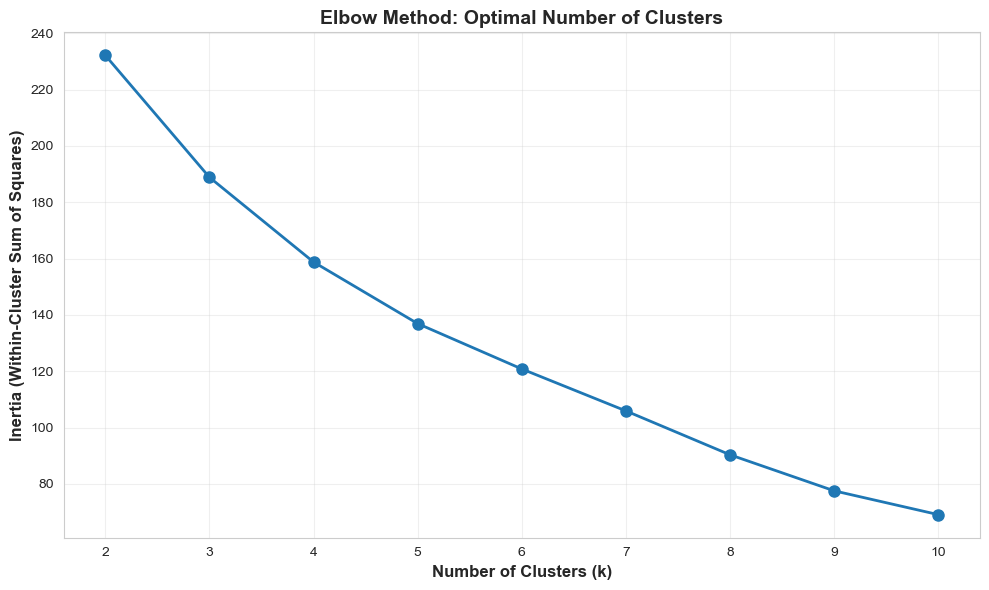

✓ Tested k from 2 to 10 clusters

Look for the 'elbow' where the curve bends - that's your optimal k


In [6]:
# Step 3: Determine Optimal Number of Clusters (Elbow Method)
# ============================================================

# Test different numbers of clusters
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
plt.title('Elbow Method: Optimal Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

print(f"✓ Tested k from {min(K_range)} to {max(K_range)} clusters")
print("\nLook for the 'elbow' where the curve bends - that's your optimal k")

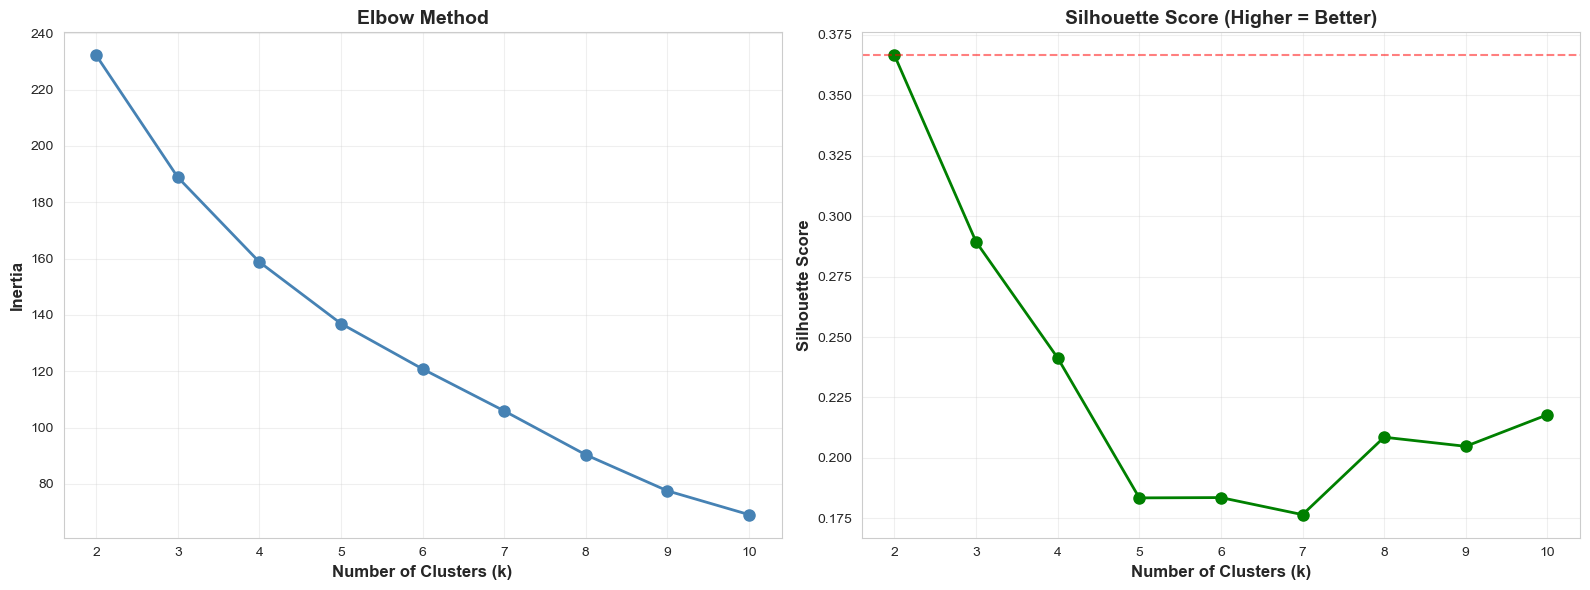


Silhouette Scores:
  k=2: 0.367
  k=3: 0.289
  k=4: 0.241
  k=5: 0.183
  k=6: 0.184
  k=7: 0.177
  k=8: 0.209
  k=9: 0.205
  k=10: 0.218

✓ Best k by Silhouette Score: 2


In [7]:
# Step 3B: Silhouette Score Method
# =================================

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Elbow Method (with rate of change)
axes[0].plot(K_range, inertias, marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Inertia', fontsize=12, fontweight='bold')
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(K_range)

# Plot 2: Silhouette Score (higher is better)
axes[1].plot(K_range, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[1].set_title('Silhouette Score (Higher = Better)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(K_range)
axes[1].axhline(y=max(silhouette_scores), color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Print results
print("\nSilhouette Scores:")
for k, score in zip(K_range, silhouette_scores):
    print(f"  k={k}: {score:.3f}")

best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✓ Best k by Silhouette Score: {best_k}")

### Apply K-Means Clustering (k=2 and k=3)

In [8]:
# Step 4: Apply K-Means Clustering
# =================================

# Apply K-Means with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_2 = kmeans_2.fit_predict(X_scaled)

# Apply K-Means with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_3 = kmeans_3.fit_predict(X_scaled)

# Add cluster labels to dataframe
df_scaled['Cluster_k2'] = clusters_2
df_scaled['Cluster_k3'] = clusters_3

# Display results
print("✓ Clustering completed for k=2 and k=3\n")

print("Cluster Distribution (k=2):")
print(df_scaled['Cluster_k2'].value_counts().sort_index())

print("\nCluster Distribution (k=3):")
print(df_scaled['Cluster_k3'].value_counts().sort_index())

print("\nCountries by Cluster (k=2):")
for cluster in sorted(df_scaled['Cluster_k2'].unique()):
    countries_in_cluster = df_scaled[df_scaled['Cluster_k2'] == cluster]['COUNTRY'].tolist()
    print(f"\nCluster {cluster} ({len(countries_in_cluster)} countries):")
    print(f"  {', '.join(countries_in_cluster)}")

print("\n" + "="*70)

print("\nCountries by Cluster (k=3):")
for cluster in sorted(df_scaled['Cluster_k3'].unique()):
    countries_in_cluster = df_scaled[df_scaled['Cluster_k3'] == cluster]['COUNTRY'].tolist()
    print(f"\nCluster {cluster} ({len(countries_in_cluster)} countries):")
    print(f"  {', '.join(countries_in_cluster)}")

✓ Clustering completed for k=2 and k=3

Cluster Distribution (k=2):
Cluster_k2
0     7
1    29
Name: count, dtype: int64

Cluster Distribution (k=3):
Cluster_k3
0     5
1    23
2     8
Name: count, dtype: int64

Countries by Cluster (k=2):

Cluster 0 (7 countries):
  CRI, GRC, HRV, HUN, IRL, ROU, SVK

Cluster 1 (29 countries):
  AUS, AUT, BEL, CAN, CHE, CYP, CZE, DEU, DNK, ESP, EST, FIN, FRA, ISL, ISR, ITA, JPN, KOR, LTU, LUX, LVA, MEX, NLD, NOR, POL, PRT, SVN, SWE, USA


Countries by Cluster (k=3):

Cluster 0 (5 countries):
  CRI, HRV, HUN, IRL, SVK

Cluster 1 (23 countries):
  AUS, AUT, BEL, CAN, CHE, CYP, CZE, DNK, ESP, EST, FIN, FRA, ISL, ISR, ITA, LUX, MEX, NLD, NOR, POL, PRT, SVN, SWE

Cluster 2 (8 countries):
  DEU, GRC, JPN, KOR, LTU, LVA, ROU, USA


In [11]:
# Apply K-Means with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_4 = kmeans_4.fit_predict(X_scaled)
df_scaled['Cluster_k4'] = clusters_4

print("\nCountries by Cluster (k=4):")
for cluster in sorted(df_scaled['Cluster_k4'].unique()):
    countries_in_cluster = df_scaled[df_scaled['Cluster_k4'] == cluster]['COUNTRY'].tolist()
    print(f"\nCluster {cluster} ({len(countries_in_cluster)} countries):")
    print(f"  {', '.join(countries_in_cluster)}")


Countries by Cluster (k=4):

Cluster 0 (6 countries):
  DEU, JPN, KOR, LTU, LVA, USA

Cluster 1 (20 countries):
  AUS, AUT, BEL, CAN, CHE, CYP, CZE, ESP, EST, FIN, FRA, ISR, ITA, LUX, MEX, NOR, POL, PRT, SVN, SWE

Cluster 2 (5 countries):
  GRC, HRV, HUN, ROU, SVK

Cluster 3 (5 countries):
  CRI, DNK, IRL, ISL, NLD


### Analyze Cluster Characteristics

In [13]:
# Step 5: Cluster Characteristics Analysis
# =========================================

# Add original (unscaled) features back for interpretation
df_results = df.copy()
df_results['Cluster_k2'] = clusters_2
df_results['Cluster_k3'] = clusters_3

# Analyze k=2 clusters
print("\n" + "="*70)
print("CLUSTER ANALYSIS: k=2")
print("="*70)

for cluster in sorted(df_results['Cluster_k2'].unique()):
    cluster_data = df_results[df_results['Cluster_k2'] == cluster]
    print(f"\n{'='*70}")
    print(f"Cluster {cluster}: {len(cluster_data)} countries")
    print(f"{'='*70}")
    print(f"Countries: {', '.join(cluster_data['COUNTRY'].tolist())}")
    print(f"\nAverage Characteristics:")
    print(cluster_data[feature_columns].mean().to_string())

# Analyze k=3 clusters
print("\n\n" + "="*70)
print("CLUSTER ANALYSIS: k=3")
print("="*70)

for cluster in sorted(df_results['Cluster_k3'].unique()):
    cluster_data = df_results[df_results['Cluster_k3'] == cluster]
    print(f"\n{'='*70}")
    print(f"Cluster {cluster}: {len(cluster_data)} countries")
    print(f"{'='*70}")
    print(f"Countries: {', '.join(cluster_data['COUNTRY'].tolist())}")
    print(f"\nAverage Characteristics:")
    print(cluster_data[feature_columns].mean().to_string())


CLUSTER ANALYSIS: k=2

Cluster 0: 7 countries
Countries: CRI, GRC, HRV, HUN, IRL, ROU, SVK

Average Characteristics:
PC_HEALTHXP_growth         -3.31
PC_GDP_growth              -3.43
USD_CAP_growth              0.31
PC_HEALTHXP_avg            23.41
PC_GDP_avg                  1.65
USD_CAP_avg               468.72
PC_HEALTHXP_volatility      2.71
PC_GDP_volatility           0.25
USD_CAP_volatility         39.38

Cluster 1: 29 countries
Countries: AUS, AUT, BEL, CAN, CHE, CYP, CZE, DEU, DNK, ESP, EST, FIN, FRA, ISL, ISR, ITA, JPN, KOR, LTU, LUX, LVA, MEX, NLD, NOR, POL, PRT, SVN, SWE, USA

Average Characteristics:
PC_HEALTHXP_growth         -1.26
PC_GDP_growth               0.26
USD_CAP_growth              2.85
PC_HEALTHXP_avg            15.24
PC_GDP_avg                  1.32
USD_CAP_avg               538.62
PC_HEALTHXP_volatility      0.91
PC_GDP_volatility           0.07
USD_CAP_volatility         49.93


CLUSTER ANALYSIS: k=3

Cluster 0: 5 countries
Countries: CRI, HRV, HUN, IRL, SVK

### Cluster Visualization

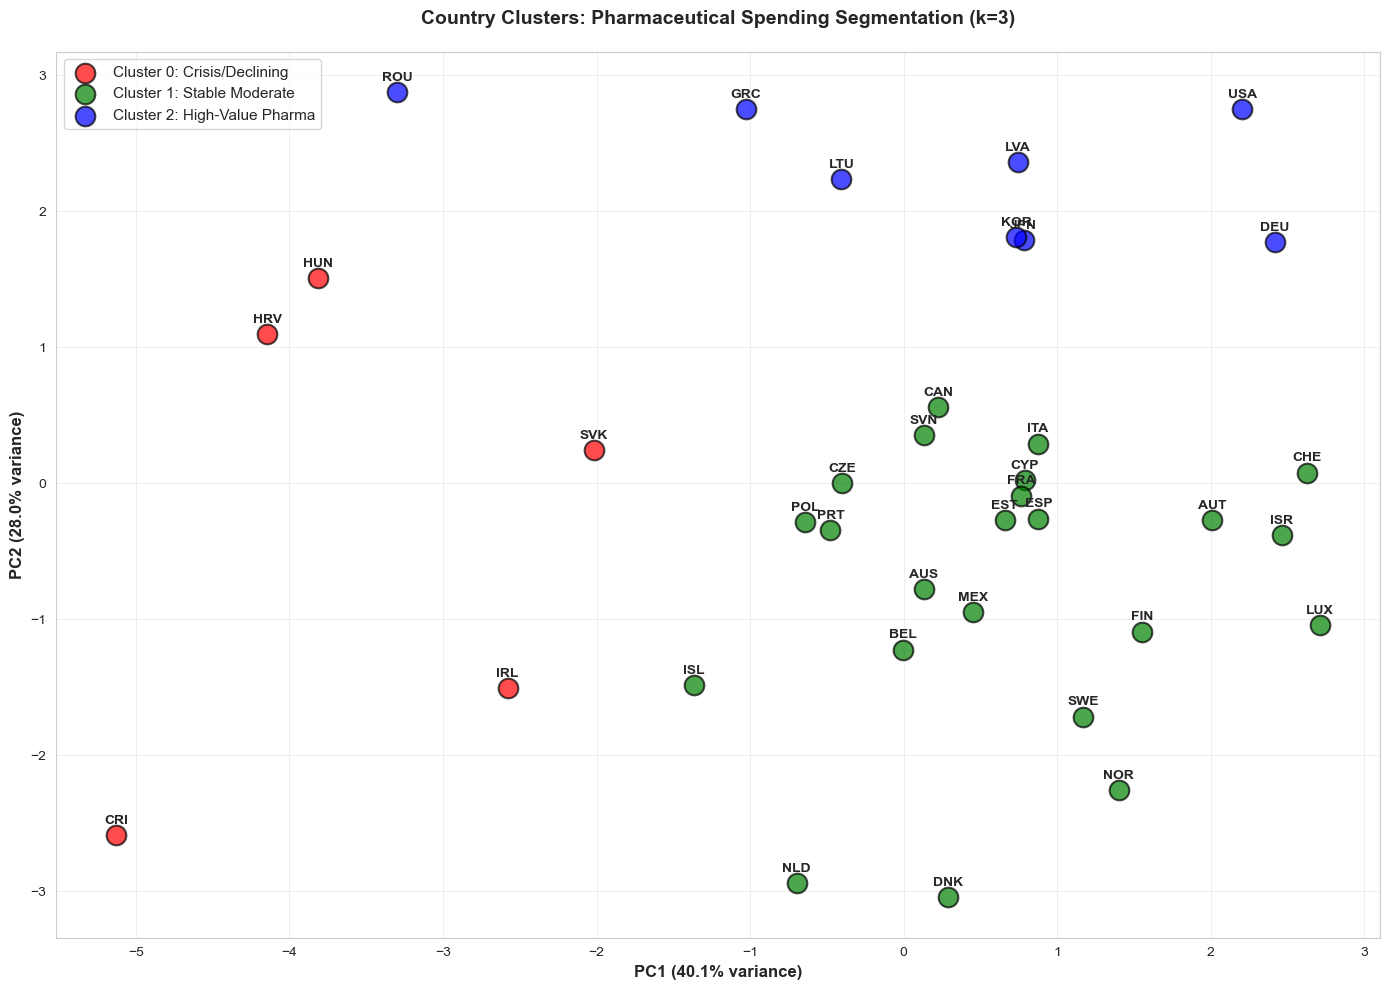


✓ Clusters visualized using PCA
  PC1 explains 40.1% of variance
  PC2 explains 28.0% of variance
  Total explained: 68.1%


In [15]:
# Step 6: Visualize Clusters
# ===========================

from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create visualization for k=3
fig, ax = plt.subplots(figsize=(14, 10))

# Define colors for clusters
colors = ['red', 'green', 'blue']
cluster_names = ['Crisis/Declining', 'Stable Moderate', 'High-Value Pharma']

# Plot each cluster
for cluster in sorted(df_results['Cluster_k3'].unique()):
    mask = df_results['Cluster_k3'] == cluster
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], 
              c=colors[cluster], label=f'Cluster {cluster}: {cluster_names[cluster]}',
              s=200, alpha=0.7, edgecolors='black', linewidth=1.5)
    
    # Add country labels
    for i, country in enumerate(df_results[mask]['COUNTRY']):
        ax.annotate(country, # Text to display
                    (X_pca[mask, 0][i], X_pca[mask, 1][i]), # Position at data point
                    xytext=(0, 8), # Offset label 8 points UP from data point
                    textcoords='offset points', # Use points as offset unit
                   fontsize=10, # Font size for country labels
                   fontweight='bold', 
                   ha='center' # Horizontal alignment: center
                   )

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', 
             fontsize=12, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', 
             fontsize=12, fontweight='bold')
ax.set_title('Country Clusters: Pharmaceutical Spending Segmentation (k=3)', 
            fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Clusters visualized using PCA")
print(f"  PC1 explains {pca.explained_variance_ratio_[0]*100:.1f}% of variance")
print(f"  PC2 explains {pca.explained_variance_ratio_[1]*100:.1f}% of variance")
print(f"  Total explained: {sum(pca.explained_variance_ratio_)*100:.1f}%")

### Export Results and Create Summary

In [11]:
# Export Results and Summary
# ===================================

# Create final results dataframe with original features + clusters
final_results = df.copy()
final_results['Cluster'] = clusters_3

# Map cluster numbers to names
cluster_names_map = {
    0: 'Crisis/Declining',
    1: 'Stable Moderate',
    2: 'High-Value Pharma'
}
final_results['Cluster_Name'] = final_results['Cluster'].map(cluster_names_map)

# Save to CSV
output_path = '../Data/processing/clustering_results.csv'
final_results.to_csv(output_path, index=False)

print(f"✓ Results saved to: {output_path}\n")

# Display summary
print("="*70)
print("CLUSTERING SUMMARY: MARKET SEGMENTATION")
print("="*70)

for cluster in sorted(final_results['Cluster'].unique()):
    cluster_data = final_results[final_results['Cluster'] == cluster]
    print(f"\n{cluster_names_map[cluster].upper()} (Cluster {cluster})")
    print("-"*70)
    print(f"Countries ({len(cluster_data)}): {', '.join(sorted(cluster_data['COUNTRY'].tolist()))}")
    print(f"\nKey Metrics:")
    print(f"  Pharma Growth:     {cluster_data['PC_HEALTHXP_growth'].mean():6.2f}%")
    print(f"  GDP Growth:        {cluster_data['PC_GDP_growth'].mean():6.2f}%")
    print(f"  Per Capita Growth: {cluster_data['USD_CAP_growth'].mean():6.2f}%")
    print(f"  Pharma Share:      {cluster_data['PC_HEALTHXP_avg'].mean():6.2f}%")
    print(f"  Spending/Capita:   ${cluster_data['USD_CAP_avg'].mean():,.0f}")
    print(f"  Volatility:        {cluster_data['PC_HEALTHXP_volatility'].mean():6.2f}")

print("\n" + "="*70)
print("CLUSTERING COMPLETED SUCCESSFULLY")
print("="*70)

✓ Results saved to: ../Data/processing/clustering_results.csv

CLUSTERING SUMMARY: MARKET SEGMENTATION

CRISIS/DECLINING (Cluster 0)
----------------------------------------------------------------------
Countries (5): CRI, HRV, HUN, IRL, SVK

Key Metrics:
  Pharma Growth:      -3.63%
  GDP Growth:         -4.58%
  Per Capita Growth:  -0.75%
  Pharma Share:       20.76%
  Spending/Capita:   $450
  Volatility:          2.38

STABLE MODERATE (Cluster 1)
----------------------------------------------------------------------
Countries (23): AUS, AUT, BEL, CAN, CHE, CYP, CZE, DNK, ESP, EST, FIN, FRA, ISL, ISR, ITA, LUX, MEX, NLD, NOR, POL, PRT, SVN, SWE

Key Metrics:
  Pharma Growth:      -1.24%
  GDP Growth:          0.15%
  Per Capita Growth:   2.45%
  Pharma Share:       14.08%
  Spending/Capita:   $495
  Volatility:          0.82

HIGH-VALUE PHARMA (Cluster 2)
----------------------------------------------------------------------
Countries (8): DEU, GRC, JPN, KOR, LTU, LVA, ROU, USA

Ke